In [7]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import time

# Define the data directory
data_dir = 'C:/Users/fawwa/Downloads/RESISC45'

# Define the transformations for data preprocessing
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # ResNet input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),  # Larger size for better representation
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
train_dataset = datasets.ImageFolder(data_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(data_dir, transform=val_transform)

# Define batch size
batch_size = 64

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model architecture
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_dataset.classes))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
epochs = 20  
best_val_acc = 0.0
start_time = time.time()

for epoch in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    val_correct = 0

    # Training
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == labels).sum().item()

    # Validation
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_correct += (predicted == labels).sum().item()

    train_loss /= len(train_dataset)
    val_loss /= len(val_dataset)
    train_accuracy = 100.0 * train_correct / len(train_dataset)
    val_accuracy = 100.0 * val_correct / len(val_dataset)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
          f'Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%')

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy

print(f"Training complete in {(time.time() - start_time) / 60:.2f} minutes.")
print(f'Best Validation Accuracy: {best_val_acc:.2f}%')


Epoch 1/20, Train Loss: 0.9223, Val Loss: 0.2779, Train Acc: 74.36%, Val Acc: 91.33%
Epoch 2/20, Train Loss: 0.4772, Val Loss: 0.2013, Train Acc: 85.56%, Val Acc: 93.70%
Epoch 3/20, Train Loss: 0.3987, Val Loss: 0.1513, Train Acc: 87.66%, Val Acc: 95.18%
Epoch 4/20, Train Loss: 0.3701, Val Loss: 0.1522, Train Acc: 88.36%, Val Acc: 94.99%
Epoch 5/20, Train Loss: 0.3252, Val Loss: 0.1127, Train Acc: 89.96%, Val Acc: 96.44%
Epoch 6/20, Train Loss: 0.2924, Val Loss: 0.0915, Train Acc: 90.86%, Val Acc: 96.98%
Epoch 7/20, Train Loss: 0.2936, Val Loss: 0.1047, Train Acc: 90.78%, Val Acc: 96.41%
Epoch 8/20, Train Loss: 0.2652, Val Loss: 0.0822, Train Acc: 91.55%, Val Acc: 97.23%
Epoch 9/20, Train Loss: 0.2578, Val Loss: 0.0705, Train Acc: 92.04%, Val Acc: 97.85%
Epoch 10/20, Train Loss: 0.2522, Val Loss: 0.0634, Train Acc: 92.13%, Val Acc: 98.11%
Epoch 11/20, Train Loss: 0.2414, Val Loss: 0.0652, Train Acc: 92.26%, Val Acc: 97.83%
Epoch 12/20, Train Loss: 0.2252, Val Loss: 0.0500, Train Acc: 9

In [ ]:
torch.save(model.state_dict(), 'resnet18_model.pth')

In [11]:
import os

# Define the path to your dataset directory
data_dir = 'C:/Users/fawwa/Downloads/RESISC45'

# Get a list of all subdirectories (classes) in the dataset directory
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Print all the classes
for class_name in classes:
    print(class_name)


airport
beach
bridge
circular_farmland
cloud
commercial_area
dense_residential
desert
forest
freeway
harbor
industrial_area
intersection
lake
meadow
medium_residential
mountain
overpass
railway
railway_station
rectangular_farmland
river
road
snowberg
sparse_residential
terrace
thermal_power_station
wetland


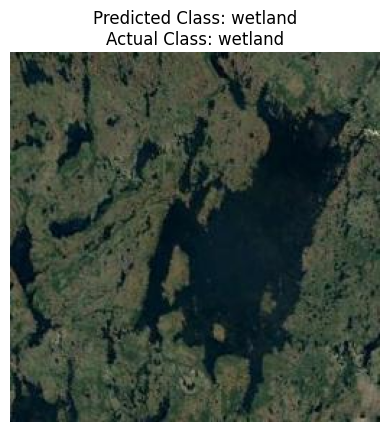

In [ ]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the transformations for data preprocessing
val_transform = transforms.Compose([
    transforms.Resize(256),  # Larger size for better representation
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the model
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 28)  # Assuming 28 classes in your dataset
model.load_state_dict(torch.load('resnet18_model.pth'))  # Load the trained model
model.eval()

# Function to visualize prediction
def visualize_prediction(image_path, model):
    image = Image.open(image_path)
    image_tensor = val_transform(image).unsqueeze(0)  
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        predicted_class = output.argmax(dim=1).item()
    
    # Extract actual class name from the image path
    actual_class_name = os.path.basename(os.path.dirname(image_path))
    
    data_dir = os.path.dirname(os.path.dirname(image_path))  
    classes = sorted(os.listdir(data_dir))  
    predicted_class_name = classes[predicted_class]
    
    plt.imshow(np.array(image))
    plt.title(f'Predicted Class: {predicted_class_name}\nActual Class: {actual_class_name}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'C:/Users/fawwa/Downloads/RESISC45/wetland/wetland_056.jpg'  
visualize_prediction(image_path, model)


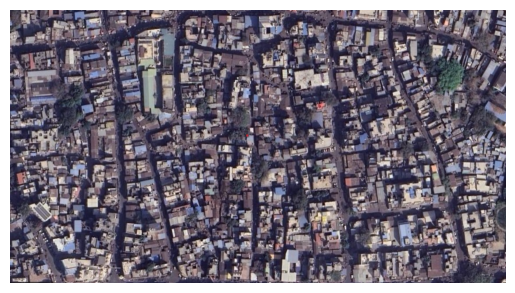

Predicted Class: commercial_area


In [3]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

# Define the transformations for data preprocessing
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the model
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 28)  # Assuming 28 classes in your dataset
model.load_state_dict(torch.load('resnet18_model.pth'))  # Load the trained model
model.eval()

# Function to predict class from image tensor
def predict_class(image_tensor, model):
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        predicted_class = output.argmax(dim=1).item()
        # Assuming you have a list of class names
        class_names = ['airport', 'beach', 'bridge', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway', 'harbor', 'industrial_area', 'intersection', 'lake', 'meadow', 'medium_residential', 'mountain', 'overpass', 'railway', 'railway_station', 'rectangular_farmland', 'river', 'road', 'snowberg', 'sparse_residential', 'terrace', 'thermal_power_station', 'wetland']
        predicted_class_name = class_names[predicted_class]
    return predicted_class_name

# Example usage
# Load an image and preprocess it
image = Image.open("C:/Users/fawwa/Documents/ML/pune.jpg")
image_tensor = val_transform(image).unsqueeze(0)  # Add batch dimension

plt.imshow(image)
plt.axis('off')
plt.show()

# Predict the class
predicted_class = predict_class(image_tensor, model)
print(f'Predicted Class: {predicted_class}')

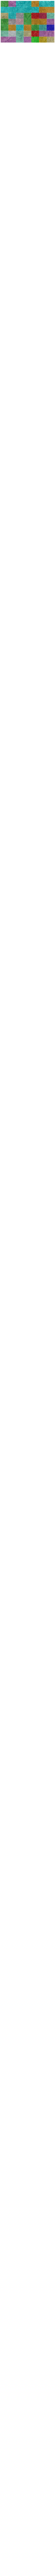

In [11]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the transformations for data preprocessing
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the model
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 28)
model.load_state_dict(torch.load('resnet18_model.pth'))  # Load the trained model
model.eval()

# Function to predict class from image tensor
def predict_class(image_tensor, model):
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        predicted_class_idx = output.argmax(dim=1).item()
        class_names = ['airport', 'beach', 'bridge', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway', 'harbor', 'industrial_area', 'intersection', 'lake', 'meadow', 'medium_residential', 'mountain', 'overpass', 'railway', 'railway_station', 'rectangular_farmland', 'river', 'road', 'snowberg', 'sparse_residential', 'terrace', 'thermal_power_station', 'wetland']
        predicted_class_name = class_names[predicted_class_idx]
        # Assign color to the predicted class
        colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'lavender', 'brown', 'maroon', 'olive', 'navy', 'aquamarine', 'turquoise', 'silver', 'limegreen', 'gold', 'azure', 'khaki', 'indigo', 'coral', 'crimson', 'orchid', 'salmon', 'skyblue']
        predicted_color = colors[predicted_class_idx]
    return predicted_class_name, predicted_color

# Function to split the image into tiles
def split_image(image, num_tiles_per_dimension):
    width, height = image.size
    tile_width = width // num_tiles_per_dimension
    tile_height = height // num_tiles_per_dimension
    tiles = []
    for i in range(num_tiles_per_dimension):
        for j in range(num_tiles_per_dimension):
            left = i * tile_width
            upper = j * tile_height
            right = left + tile_width
            lower = upper + tile_height
            tiles.append(image.crop((left, upper, right, lower)))
    return tiles

# Load an image and preprocess it
image_path = "C:/Users/fawwa/Documents/ML/PUNE_NEW.jpg"
original_image = Image.open(image_path)
tiles = split_image(original_image, num_tiles_per_dimension=55)

# Predict the class for each tile and map the classes on the original image
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(original_image)

for i, tile in enumerate(tiles):
    # Preprocess the tile
    tile_tensor = val_transform(tile).unsqueeze(0)  # Add batch dimension
    # Predict the class and color for the tile
    predicted_class, predicted_color = predict_class(tile_tensor, model)
    # Calculate the coordinates for drawing the rectangle on the original image
    tile_width = original_image.width // 7
    tile_height = original_image.height // 7
    x = (i % 7) * tile_width
    y = (i // 7) * tile_height
    # Draw a transparent rectangle with the predicted color
    ax.add_patch(plt.Rectangle((x, y), tile_width, tile_height, fill=True, color=predicted_color, alpha=0.5))
    # Add class name as text
    ax.text(x + 5, y + 15, predicted_class, fontsize=4, color='white')

plt.axis('off')
plt.show()


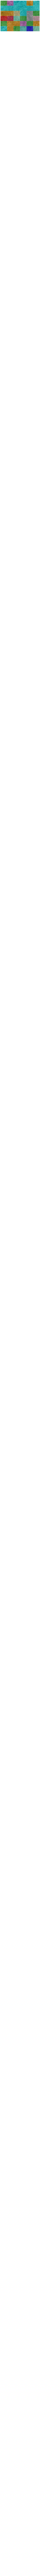

In [15]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the transformations for data preprocessing
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the model
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 28)
model.load_state_dict(torch.load('resnet18_model.pth'))  # Load the trained model
model.eval()

# Function to predict class from image tensor
def predict_class(image_tensor, model):
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        predicted_class_idx = output.argmax(dim=1).item()
        class_names = ['airport', 'beach', 'bridge', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway', 'harbor', 'industrial_area', 'intersection', 'lake', 'meadow', 'medium_residential', 'mountain', 'overpass', 'railway', 'railway_station', 'rectangular_farmland', 'river', 'road', 'snowberg', 'sparse_residential', 'terrace', 'thermal_power_station', 'wetland']
        predicted_class_name = class_names[predicted_class_idx]
        # Assign color to the predicted class
        colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'lavender', 'brown', 'maroon', 'olive', 'navy', 'aquamarine', 'turquoise', 'silver', 'limegreen', 'gold', 'azure', 'khaki', 'indigo', 'coral', 'crimson', 'orchid', 'salmon', 'skyblue']
        predicted_color = colors[predicted_class_idx]
    return predicted_class_name, predicted_color

# Function to split the image into tiles
def split_image(image, num_tiles_per_dimension):
    width, height = image.size
    tile_width = width // num_tiles_per_dimension
    tile_height = height // num_tiles_per_dimension
    tiles = []
    for i in range(num_tiles_per_dimension):
        for j in range(num_tiles_per_dimension):
            left = i * tile_width
            upper = j * tile_height
            right = left + tile_width
            lower = upper + tile_height
            tiles.append(image.crop((left, upper, right, lower)))
    return tiles

# Load an image and preprocess it
image_path = "C:/Users/fawwa/Documents/ML/PUNE_NEW.jpg"
original_image = Image.open(image_path)
tiles = split_image(original_image, num_tiles_per_dimension=55)

# Predict the class for each tile and map the classes on the original image
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(original_image)

for i, tile in enumerate(tiles):
    # Preprocess the tile
    tile_tensor = val_transform(tile).unsqueeze(0)  # Add batch dimension
    # Predict the class and color for the tile
    predicted_class, predicted_color = predict_class(tile_tensor, model)
    # Calculate the coordinates for drawing the rectangle on the original image
    tile_width = original_image.width // 6
    tile_height = original_image.height // 6
    x = (i % 6) * tile_width
    y = (i // 6) * tile_height
    # Draw a transparent rectangle with the predicted color
    ax.add_patch(plt.Rectangle((x, y), tile_width, tile_height, fill=True, color=predicted_color, alpha=0.5))
    # Add class name as text
    ax.text(x + 5, y + 15, predicted_class, fontsize=4, color='white')

plt.axis('off')
plt.show()




| Class                   | Color   |
|-------------------------|---------|
| airport                 | red     |
| beach                   | blue    |
| bridge                  | green   |
| circular_farmland       | yellow  |
| cloud                   | purple  |
| commercial_area         | orange  |
| dense_residential       | cyan    |
| desert                  | magenta |
| forest                  | lime    |
| freeway                 | pink    |
| harbor                  | teal    |
| industrial_area         | lavender|
| intersection            | brown   |
| lake                    | maroon  |
| meadow                  | olive   |
| medium_residential      | navy    |
| mountain                | aquamarine |
| overpass                | turquoise  |
| railway                 | silver     |
| railway_station         | limegreen  |
| rectangular_farmland    | gold       |
| river                   | azure      |
| road                    | khaki      |
| snowberg                | indigo     |
| sparse_residential      | coral      |
| terrace                 | crimson    |
| thermal_power_station   | orchid     |
| wetland                 | salmon     |
| unknown                 | skyblue    |

This table lists each class along with the color it is mapped to for visualization purposes. You can use this table to understand the color representation for each class in the visualizations.